In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Accuracy score in Scikit

- Accuracy = correct_classification/ all classification (for multiclass classifications)
- $\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$

In [2]:
y_true = [0, 0, 1, 1, 1, 0]
y_pred = [0, 1, 1, 0, 1, 1]
accuracy_score(y_true, y_pred)

0.5

## Confusion Matrix

From [Scikit documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group and $i$ predicted to be in group $j$.

Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.


**Notice that conventions can differ, so please check your package to know which element indicates which quantity.**

![](images/conf-mat.png)
![](images/conf-mat1.png)

[Image source: Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

In [3]:
# a toy example of confusion matrix

y_true
y_pred

confusion_matrix(y_true, y_pred)

[0, 0, 1, 1, 1, 0]

[0, 1, 1, 0, 1, 1]

array([[1, 2],
       [1, 2]])

LogisticRegression()

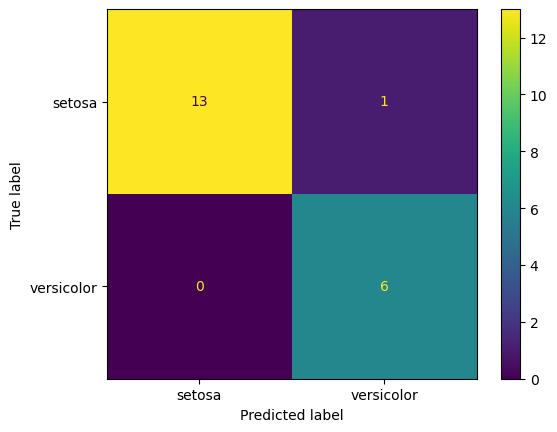

In [4]:
# confusion matrix example for iris dataset with only two properties and two classes (binary classification)
iris = datasets.load_iris()

# first 100 samples (0 = Setosa, 1 = Versicolor)
X = iris.data[:100, :2]
y = iris.target[:100]
class_names = iris.target_names[:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()

### Generalizing to multi-class classifications:

confusion matrix example for full iris dataset

LogisticRegression()

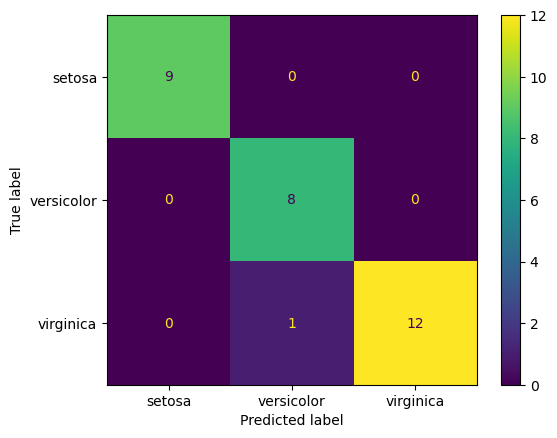

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()